# Iris Classification with KNN (K-Nearest Neighbors)


## Student: **`OUEDRAOGO Taoufiq`**
---

Le but du projet est de tester l’algorithme KNN (K-Nearest Neighbors) sur le jeu de données Iris pour classifier une fleur en fonction de ses caractéristiques (longueur et largeur du pétale):
- Visualiser les résultats pour mieux comprendre la performance du modèle
- Comprendre l’impact de différents paramètres de KNN sur la classification des espèces d’Iris

In [245]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

In [152]:
df = pd.read_csv('iris.csv')
print(df.shape)
df.head()

(150, 3)


,petal_length,petal_width,species
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


# Exploratory Data Analysis

In [519]:
#Mapping numeric labels to species names
label = {0: "setosa", 1: "versicolor", 2: "virginica"}
# Assigning colors to each species:
colors = {0: "g", 1: "r", 2: "b"}  

On confirme que :
- Toutes les colonnes ne contiennent pas de valeurs manquantes
- Les types de données des colonnes sont conformes aux attentes : d
  - Caractéristiques numériques pour `petal_length` et `petal_width`
  - Caractéristique catégorielle pour `species`

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   petal_length  150 non-null    float64
 1   petal_width   150 non-null    float64
 2   species       150 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 3.6 KB


In [158]:
df['species'].unique()

array([0, 1, 2])

Les résultats montrent que :
- La longueur des pétales (petal_length) varie beaucoup, avec une dispersion importante autour de la moyenne
- La largeur des pétales (petal_width) a une variation plus faible
- La variable "species" montre une faible variation car elle est catégorielle, représentant des espèces distinctes (0, 1, 2)

In [528]:
pd.concat([df.describe().T, df.var().to_frame(name='variance')], axis=1)

,count,mean,std,min,25%,50%,75%,max,variance
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9,3.113179
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5,0.582414
species,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0,0.671141


# Distribution of Variables

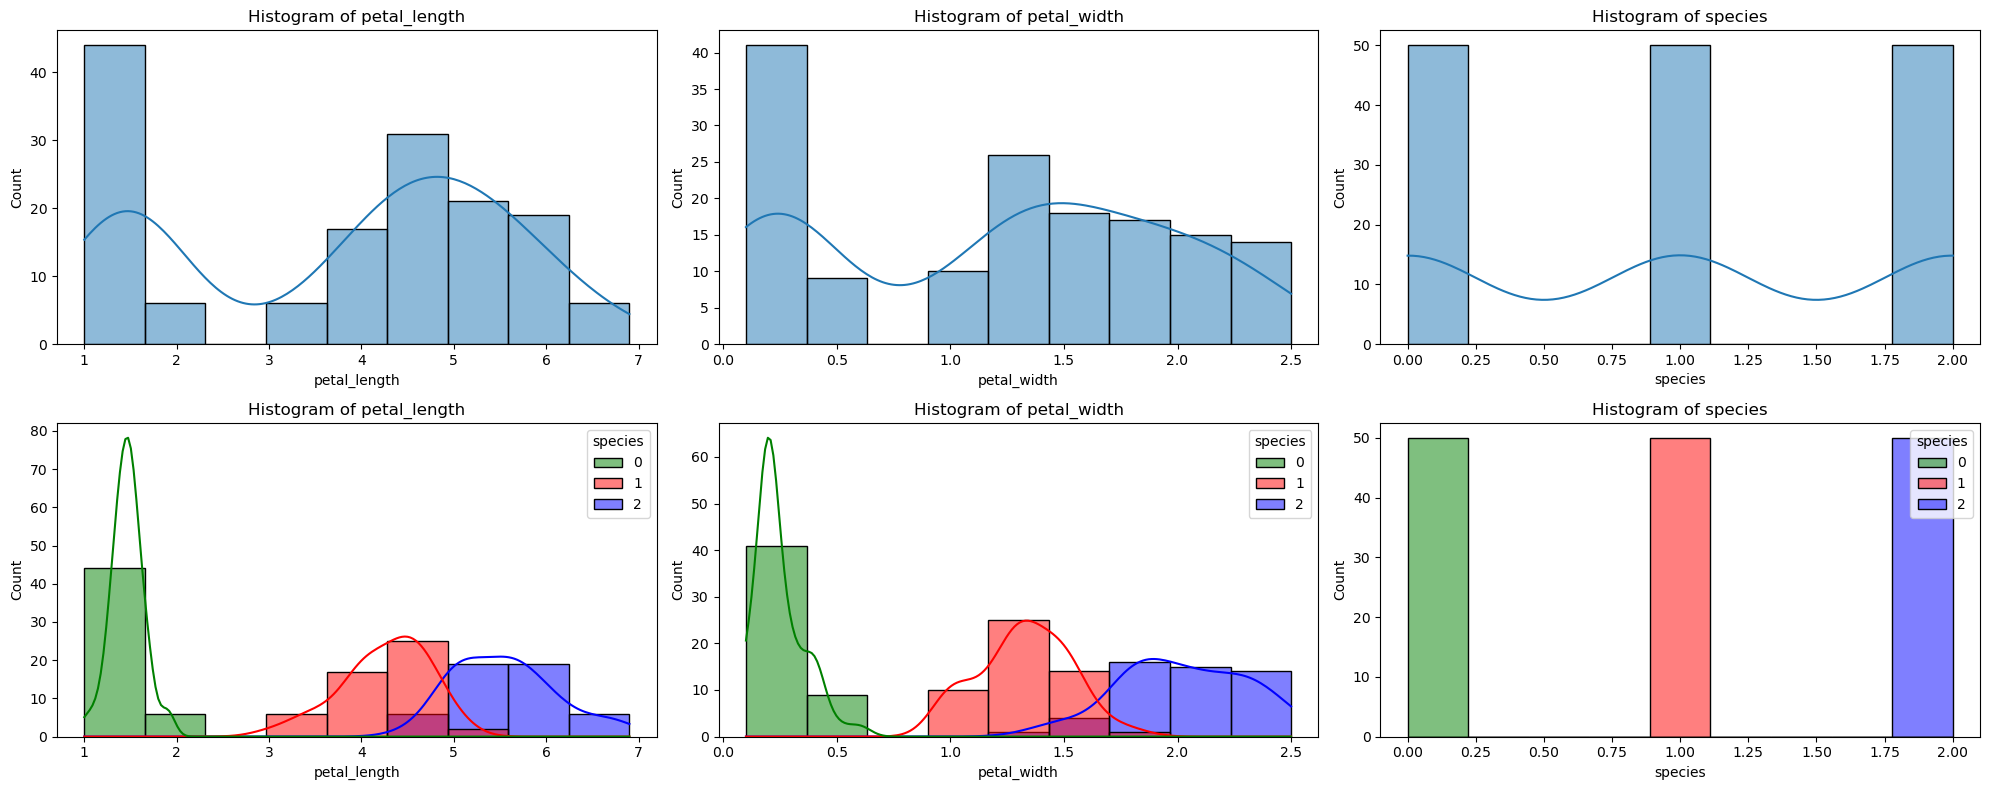

In [518]:
fig, axes = plt.subplots(2, 3, figsize=(20, 8))

for i in range(3):
    sns.histplot(data=df, x=df.columns[i], ax=axes[0, i], kde=True)
    axes[0, i].set_title(f'Histogram of {df.columns[i]}')
    
for i in range(3):
    sns.histplot(data=df, x=df.columns[i], kde=True, hue='species', palette=colors, ax=axes[1, i])
    axes[1, i].set_title(f'Histogram of {df.columns[i]}')
    
plt.tight_layout()
plt.show()

# Correlation Matrix

## Entire Dataset Correlation Matrix

La matrice de corrélation montre une relation très forte entre la longueur des pétales (petal_length) et la largeur des pétales (petal_width), avec un coefficient de corrélation de 0.96. 

Cela indique que ces 2 variables sont fortement corrélées (relation linéaire forte) : à mesure que la longueur des pétales augmente, la largeur tend à augmenter également

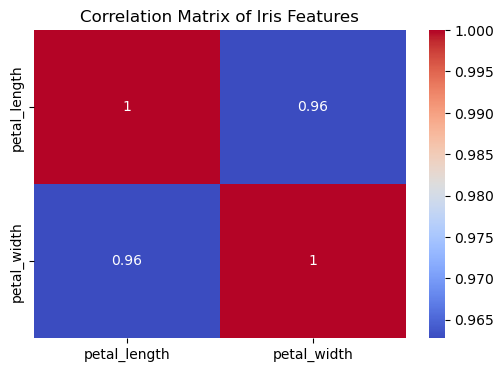

In [164]:
# Compute the correlation matrix
corr = df.drop(columns='species').corr()

# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Iris Features')
plt.show()

## Correlation Matrix by `Specy`

Les matrices de corrélation pour les différentes espèces de fleurs montrent des relations variables entre la longueur des pétales (petal_length) et la largeur des pétales (petal_width) :

- Setosa (species 0) : La corrélation est faible (0.31), ce qui signifie qu’il n’y a pas de relation linéaire marquée entre la longueur et la largeur des pétales pour cette espèce. Les deux caractéristiques sont relativement indépendantes

- Versicolor (species 1) : La corrélation est modérée (0.79), ce qui suggère que la longueur et la largeur des pétales sont plus étroitement liées pour cette espèce. Une augmentation de la longueur des pétales tend à être accompagnée d’une augmentation de la largeur des pétales

- Virginica (species 2) : La corrélation est faible (0.32), similaire à celle de l’espèce setosa. Cela indique que pour virginica, il n’y a pas de forte relation entre la longueur et la largeur des pétales

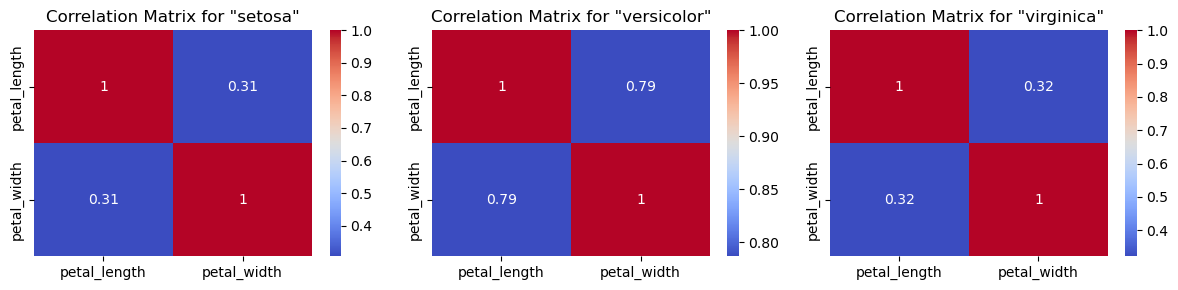

In [508]:
# For each species, compute the correlation matrix and plot
fig, axes = plt.subplots(1, len(species_list), figsize=(12, 3))
species_list = df['species'].unique()
for i, species in enumerate(species_list):
    species_df = df[df['species'] == species].drop(columns='species')    
    corr = species_df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', ax=axes[i])
    axes[i].set_title(f'Correlation Matrix for \"{label[species]}\"')
    
plt.tight_layout()
plt.show()

# Boxplots


Le graphique contient deux sections de boxplots qui montrent la distribution des longueurs (petal_length) et des largeurs (petal_width) des pétales

Ces visualisations permettent de mieux comprendre comment les variables varient selon les espèces et mettent en évidence des différences importantes, ce qui est utile pour les modèles de classification


La première ligne de boxplots représente la distribution générale de ces mesures pour l’ensemble des données, sans distinction d’espèce. Chaque boîte montre la médiane, les quartiles (25e à 75e centile) et les valeurs extrêmes. Cela met en évidence la variabilité globale des longueurs et des largeurs des pétales, avec une dispersion notable

La deuxième ligne présente les distributions séparées par espèce (setosa, versicolor et virginica). On observe que setosa se distingue clairement par des valeurs plus faibles et une dispersion moindre pour la longueur et la largeur des pétales. En revanche, les distributions de versicolor et virginica se chevauchent davantage, ce qui peut rendre leur distinction plus complexe

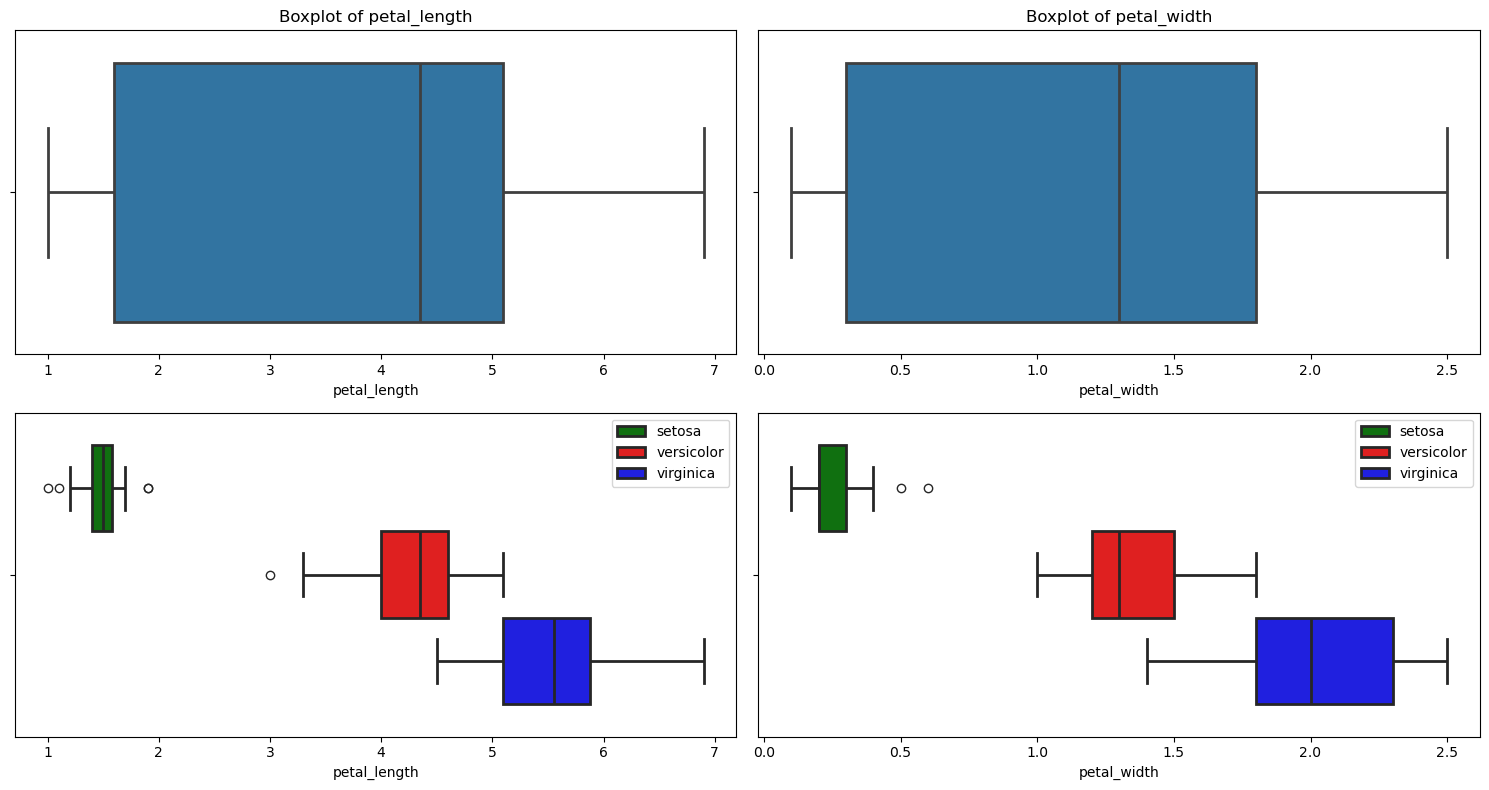

In [577]:
fig, axes = plt.subplots(2, 2, figsize=(15, 8))

# Plotting each boxplot and adding a red line for the mean
for i in range(2):
    sns.boxplot(data=df, x=df.columns[i], ax=axes[0, i], linewidth=2)
    axes[0, i].set_title(f'Boxplot of {df.columns[i]}')

# Boxplots with hues for 'specy' column and mean lines
for i in range(2):
    sns.boxplot(data=df, x=df.columns[i], hue='species', ax=axes[1, i], palette=colors, linewidth=2)
    handles, _ = axes[1, i].get_legend_handles_labels()
    axes[1, i].legend(handles, labels)

plt.tight_layout()
plt.show()

# Modeling

### Splitting data into features and target

In [169]:
X = df.drop(columns=['species'])
y = df['species']

### Create and train the KNN model

In [461]:
k = 3
knn = KNeighborsClassifier(n_neighbors=k) 
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

`metric : 'minkowski'`: La métrique utilisée pour calculer les distances entre les points. 'minkowski' est une généralisation de la distance Euclidienne et de la distance Manhattan, et son paramètre p détermine la forme exacte de la distance

`p : 2`: Cela définit la distance utilisée par la métrique Minkowski. Si p=2, la distance est la distance Euclidienne (norme L2)

In [464]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

## Tests

Le modèle KNN est basé sur les dimensions du pétale (longueur et largeur) 

La fonction `predict_` entraîne un modèle KNN avec les données, prédit l’espèce pour un nouveau point donné et retourne également les voisins les plus proches

La fonction `plot` visualise les résultats en affichant un graphique avec les données existantes, le point prédit marqué d’une croix et les voisins proches en noir

La fonction `predict_and_plot` combine les deux premières en une seule étape, effectuant la prédiction et générant le graphique. Cela permet de prédire et de visualiser facilement l’espèce d’une fleur en fonction de ses dimensions

In [540]:
def predict_(L, l, k, df=df):
    data = pd.DataFrame([[L, l]], columns=df.columns[:2]) 
    # Splitting data into features and target
    X = df.drop(columns=['species'])
    y = df['species']

    # Create and Train KNN model
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X, y)
    # Get the score (mean accuracy)
    score = f'{knn.score(X, y):.3f}'
    
    # Use Knn for predictions
    prediction = knn.predict(data)[0]
    print(f'Prediction for Longueur ({L} cm) and Largeur ({l} cm) and K={k}, mean_accuracy={score} --------->  \"{prediction}\" ({label[prediction]})')

    # Get the neighbors indices and their coordinates
    distances, indices = knn.kneighbors(data)
    # Get the neighbors data points
    neighbors = df.iloc[indices[0]] 
    return knn, score, prediction, neighbors


def plot(L, l, k, score, neighbors, prediction, ax, df=df):    
    scatter = sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='species', palette=colors, ax=ax)
    ax.scatter(L, l, color=colors[prediction], marker="X", s=150, label='New Point')
    # Plot the neighbors as small points
    ax.scatter(neighbors['petal_length'], neighbors['petal_width'], marker='o', color='black')#color=color_n)#, color='black', s=100, marker='s')

    handles, _ = scatter.get_legend_handles_labels() 
    ax.legend(handles=handles, labels=label.values()) 
    ax.set_title(f"KNN with k={k}, mean_accuracy={score}", fontweight='bold')


def predict_and_plot(L, l, k, ax=None, df=df):
    knn, score, prediction, neighbors = predict_(L, l, k, df)
    if ax:
        plot(L, l, k, score, neighbors, prediction, ax, df)

Les résultats de la prédiction pour différentes valeurs de k montrent des prédictions variées pour l’espèce de la fleur.


Egalement, les résultats montrent que la précision varie légèrement en fonction de la valeur de k, mais l’espèce prédite fluctue principalement entre “setosa” et “versicolor” selon la valeur de k, ce qui indique que le modèle trouve des voisins plus proches de ces deux espèces pour cette combinaison particulière de dimensions du pétale. Ce qui est d'autant plus compréhensible en observant les résultats des graphes (le nouveau point ajouté se trouve entre "versicolor" et "setosa").



**Les voisins les plus proches sont coloriés en noir dans les graphes** 


Nous remarquons qu'à partir de k=5, le nombre de voisins sélectionnés ne correspond pas à la valeur de k. Par exemple, pour k=5, seulement 4 voisins sont sélectionnés.

Pour k=5, nous constatons que la classe prédite est "versicolor" alors que pour k=4, la classe prédite est "setosa". Nous avons donc une anomalie car pour le même nombre de voisins sélectionnés, les classes prédites sont différentes. 

Prediction for Longueur (2.5 cm) and Largeur (0.75 cm) and K=1, mean_accuracy=0.987 --------->  "1" (versicolor)
Prediction for Longueur (2.5 cm) and Largeur (0.75 cm) and K=2, mean_accuracy=0.973 --------->  "0" (setosa)
Prediction for Longueur (2.5 cm) and Largeur (0.75 cm) and K=3, mean_accuracy=0.980 --------->  "0" (setosa)
Prediction for Longueur (2.5 cm) and Largeur (0.75 cm) and K=4, mean_accuracy=0.973 --------->  "0" (setosa)
Prediction for Longueur (2.5 cm) and Largeur (0.75 cm) and K=5, mean_accuracy=0.960 --------->  "1" (versicolor)
Prediction for Longueur (2.5 cm) and Largeur (0.75 cm) and K=6, mean_accuracy=0.967 --------->  "0" (setosa)
Prediction for Longueur (2.5 cm) and Largeur (0.75 cm) and K=7, mean_accuracy=0.967 --------->  "0" (setosa)
Prediction for Longueur (2.5 cm) and Largeur (0.75 cm) and K=8, mean_accuracy=0.967 --------->  "0" (setosa)
Prediction for Longueur (2.5 cm) and Largeur (0.75 cm) and K=9, mean_accuracy=0.960 --------->  "0" (setosa)
Prediction 

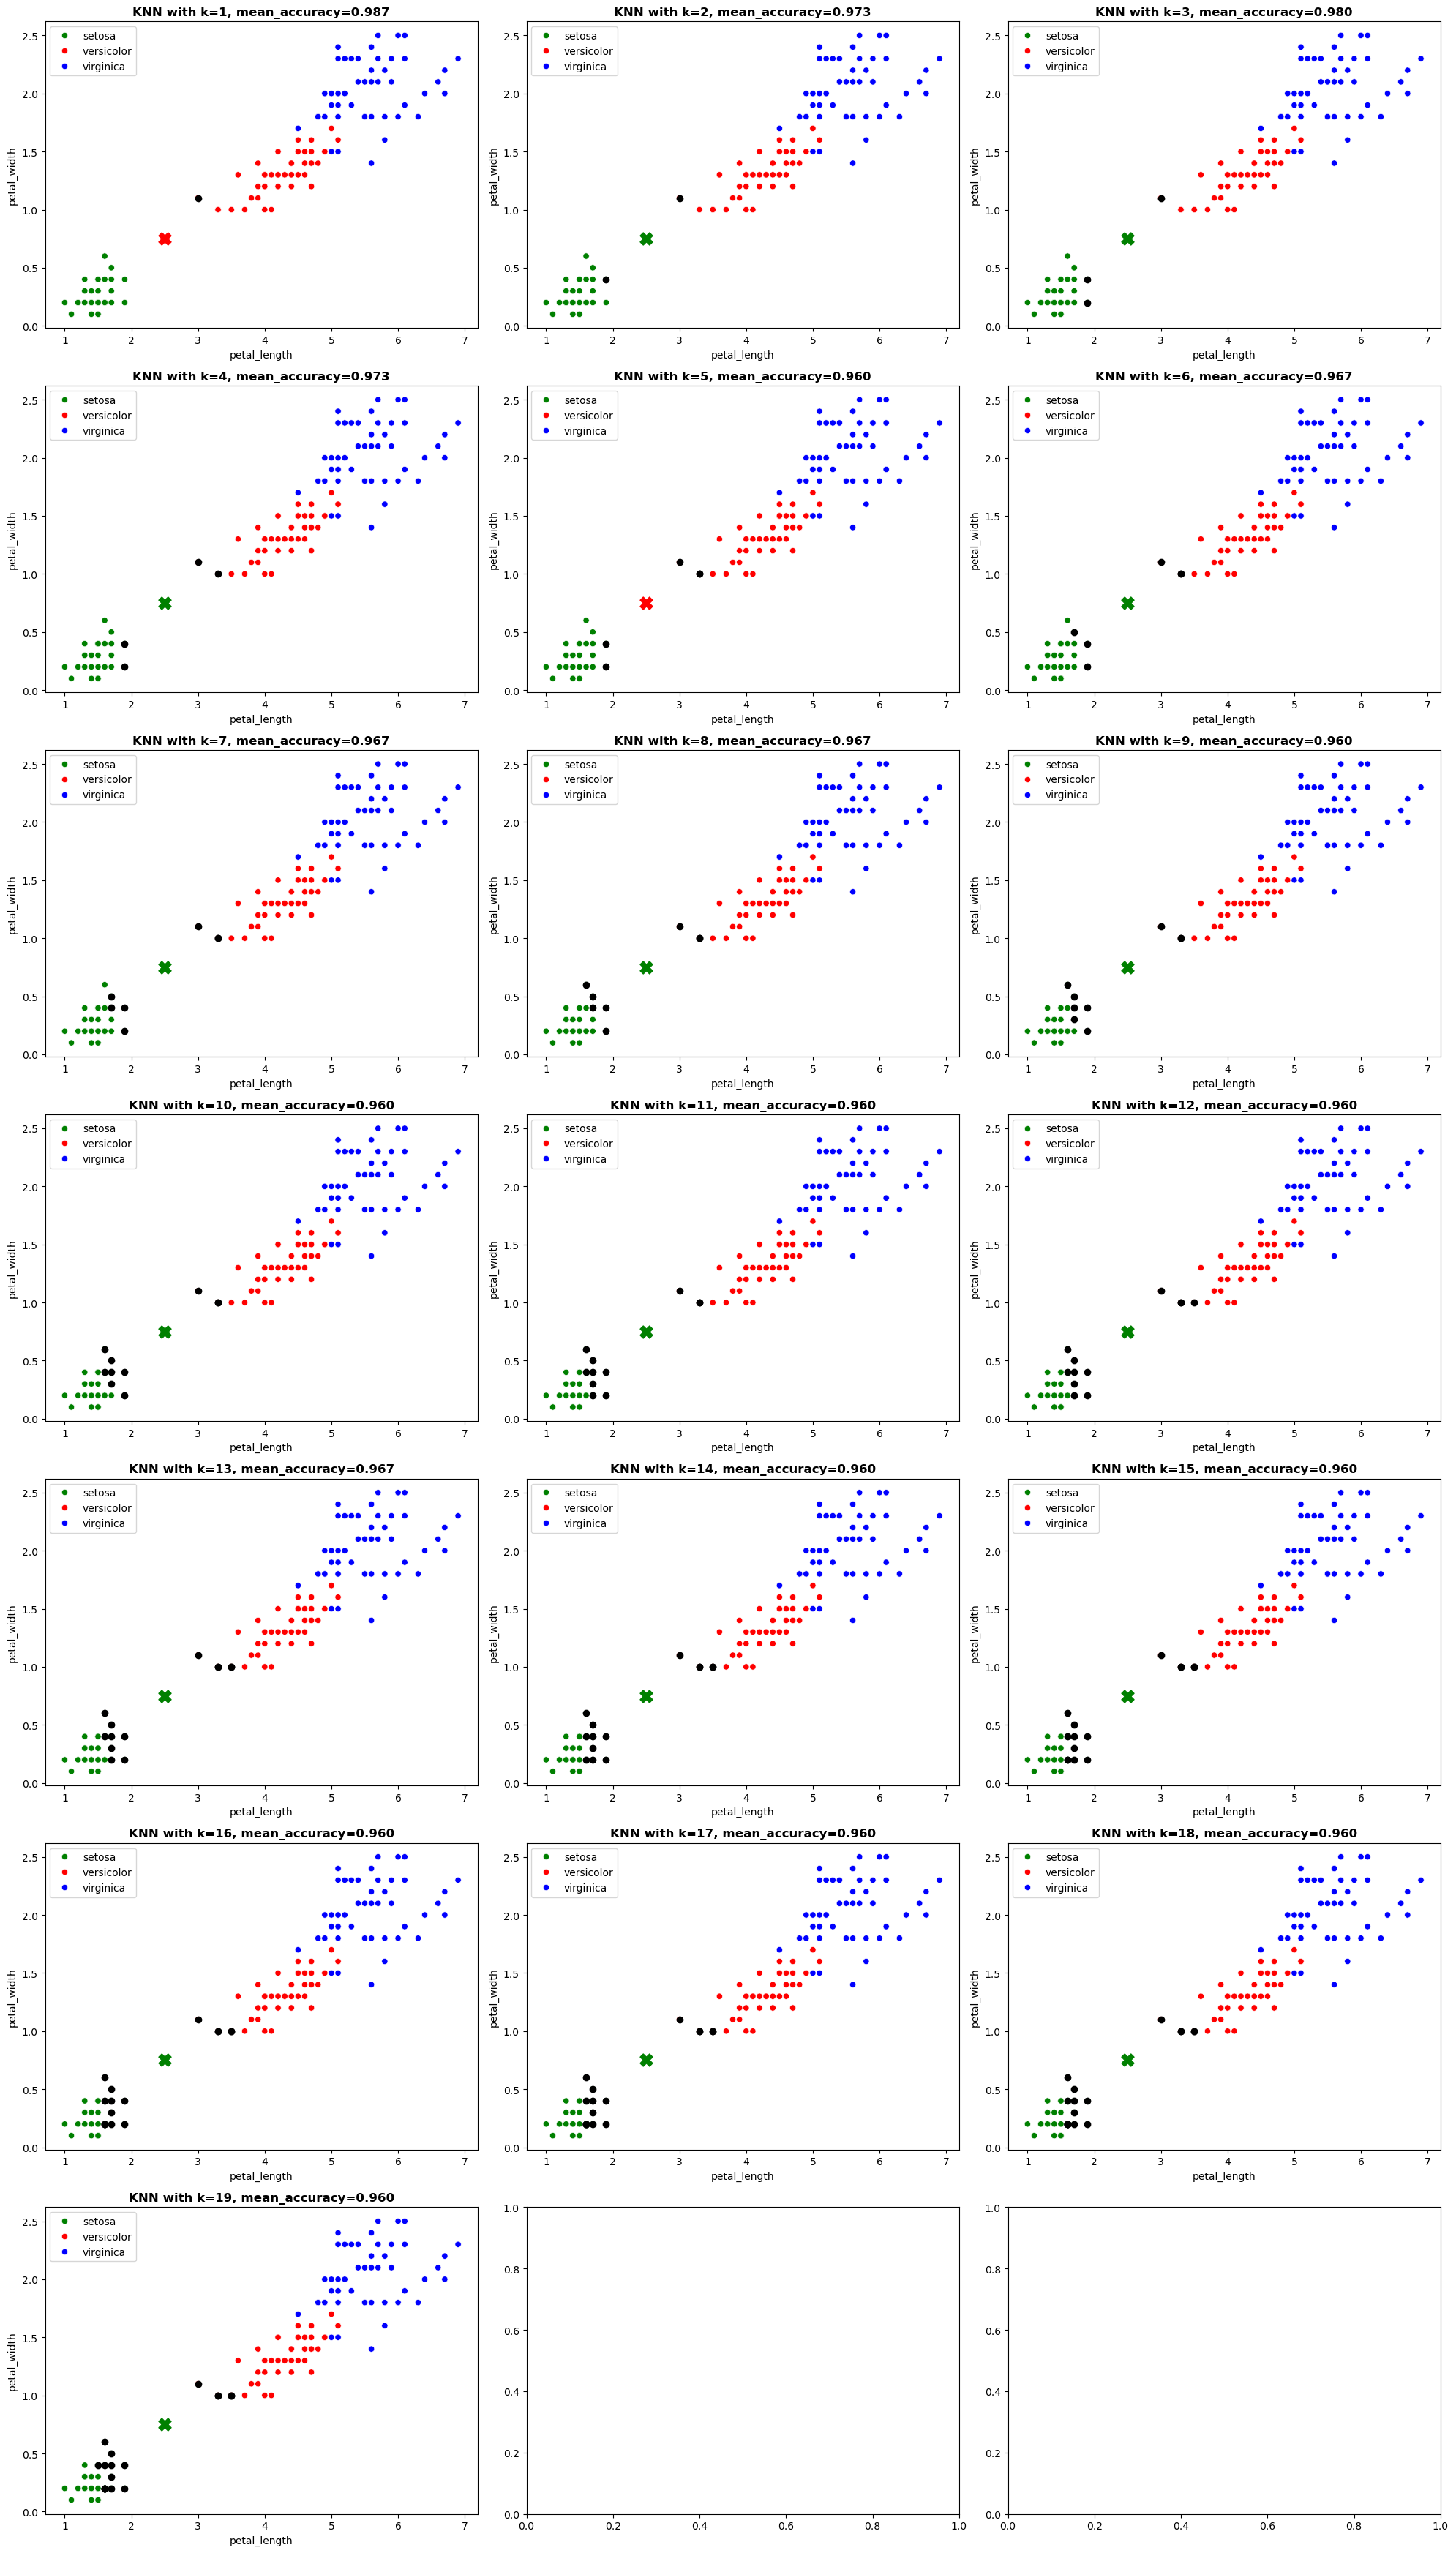

In [541]:
L, l = 2.5, 0.75
n = 20
i = int(np.ceil((n-1)/3))

# Create a figure with subplots
fig, axes = plt.subplots(i, 3, figsize=(20, 5*i)) 
axes = axes.flatten() 
for k, ax in zip(range(1, n), axes):
    predict_and_plot(L, l, k=k, ax=ax)
print()
plt.tight_layout()  
plt.show()

Pour la totalité des données, (k=150), l’algorithme ignore l’idée d’une proximité spécifique entre le point à prédire et les autres, et privilégie simplement la classe la plus fréquente dans l’ensemble des données. 

Lorsque k est égal à la taille totale du dataset (150 échantillons), tous les échantillons du dataset sont pris en compte pour prédire la classe du point d’intérêt. Dans ce cas, comme les classes sont équilibrées, aucune classe n’est majoritaire (elles sont toutes égales en nombre), donc le modèle pourrait choisir une classe arbitrairement ou selon des critères comme l’ordre des échantillons ou l’initialisation du modèle

Prediction for Longueur (2.5 cm) and Largeur (0.75 cm) and K=150, mean_accuracy=0.333 --------->  "0" (setosa)


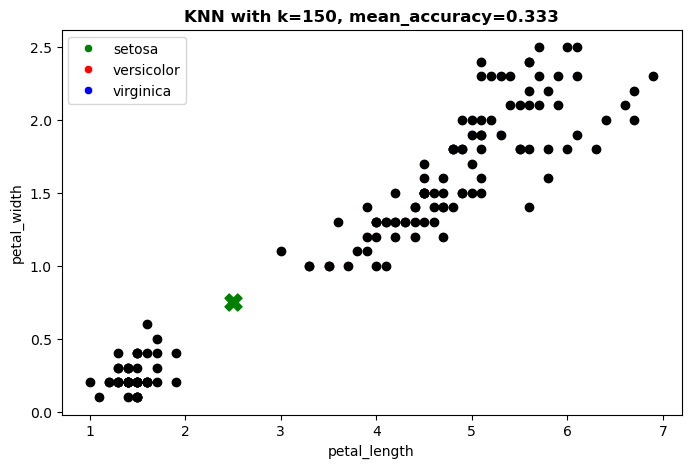

In [543]:
fig, ax = plt.subplots(figsize=(8, 5))
predict(L, l, k=len(df), ax=ax)

Prediction for Longueur (2.5 cm) and Largeur (0.75 cm) and K=5, mean_accuracy=0.960 --------->  "1" (versicolor)


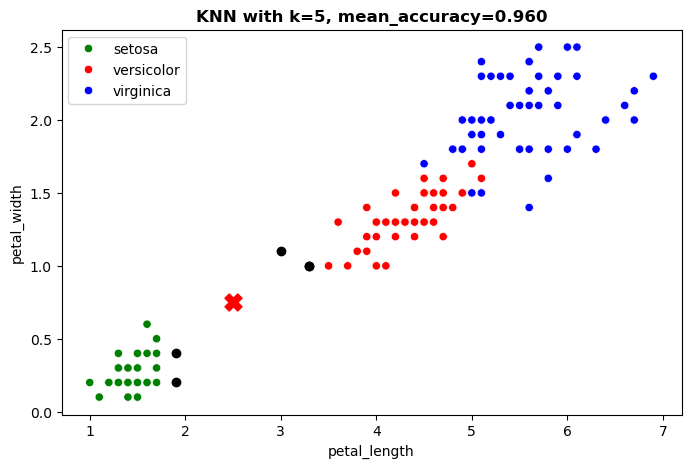

In [465]:
fig, ax = plt.subplots(figsize=(8, 5))
predict(L, l, k=5, ax=ax)

# Anomaly Study for K = 5

L’anomalie observée pour k=5 est liée au fait qu’un des voisins est un doublon. Le fait qu’il y ait un doublon parmi les voisins sélectionnés signifie que, même si k=5 est défini, l’algorithme sélectionne en fait 4 points distincts et un point en double. Cela empêche une prise de décision correcte, car l’algorithme prend un voisin supplémentaire qui pourrait influencer la prédiction.

In [544]:
knn, score, prediction, neighbors = predict_(L, l, k=5, df=df)

Prediction for Longueur (2.5 cm) and Largeur (0.75 cm) and K=5, mean_accuracy=0.960 --------->  "1" (versicolor)


In [486]:
neighbors

,petal_length,petal_width,species
98,3.0,1.1,1
44,1.9,0.4,0
24,1.9,0.2,0
93,3.3,1.0,1
57,3.3,1.0,1


# Are there any Duplicates in the data?

- df.duplicated() renvoie une série de valeurs booléennes qui indique si une ligne est un doublon par rapport aux lignes précédentes

- df[df.duplicated(keep=False)] renvoie toutes les lignes du DataFrame qui sont des doublons, où keep=False signifie que toutes les occurrences des doublons seront conservées, pas seulement la première

<br>

Le résultat de `sum(df.duplicated())` montre qu’il y a 47 doublons dans le DataFrame. Ces doublons concernent des lignes où toutes les colonnes sont identiques, et ils représentent 71 lignes au total (certaines lignes apparaissent plusieurs fois).



<br>

Les doublons dans les voisinages faussent les prédictions car l’algorithme considère un point en double qui influence de manière disproportionnée la classe prédite, en particulier dans un contexte de classes équilibrées où chaque voisin compte. 

Pour résoudre ce problème, on peut éliminer les doublons du dataset avant d'appliquer KNN, pour éviter que des points identiques ne soient pris en compte comme voisins. Une autre méthode serait d'ajuster la valeur de k pour mieux gérer la situation.

In [498]:
sum(df.duplicated())

47

In [546]:
df[df.duplicated(keep=False)].sort_values(by=list(df.columns[:-1]))

,petal_length,petal_width,species
14,1.2,0.2,0
35,1.2,0.2,0
2,1.3,0.2,0
36,1.3,0.2,0
38,1.3,0.2,0
...,...,...,...
142,5.1,1.9,2
116,5.5,1.8,2
137,5.5,1.8,2
136,5.6,2.4,2


# Are there pairs `(petal_length, petal_width)` of different `species`?


Il existe des paires (petal_length, petal_width) associées à plusieurs espèces dans notre jeu de données. Cela montre qu’il y a des situations où des valeurs de petal_length et petal_width identiques peuvent être associées à plusieurs espèces différentes, ce qui peut rendre la tâche de classification plus complexe pour un modèle KNN.

Par exemple, (4.8, 1.8) apparaît pour les espèces 1 (versicolor) et 2 (virginica) dans les lignes 70, 126, et 138.

<br>

Cela peut influencer le modèle de classification de plusieurs façons :

- Ambiguïté dans la Classification: Lorsqu’une combinaison particulière de petal_length et petal_width est partagée entre plusieurs espèces, le modèle peut rencontrer des difficultés pour assigner une classe précise à de nouvelles données ayant les mêmes caractéristiques. Cela entraîne une ambiguïté dans la prédiction et peut nuire à la précision du modèle

- Réduction de la Précision du Modèle: **Le KNN fonctionne en trouvant les points de données les plus proches (voisins) et en attribuant la classe majoritaire**. Si les voisins les plus proches appartiennent à des espèces différentes malgré des valeurs identiques pour certaines caractéristiques, cela peut réduire la précision des prédictions


- Sensibilité aux Valeurs de k: Comme observé précédemment, le choix de k peut changer les résultats de classification lorsque les voisins proches sont constitués de plusieurs classes. Le modèle peut prédire des classes différentes selon la valeur choisie pour k, ce qui peut compliquer l’interprétation des résultats et rendre le modèle sensible à ce paramètre

- Problèmes de Généralisabilité: Si de telles combinaisons ambiguës sont fréquentes dans les données d’entraînement, le modèle pourrait avoir des difficultés à généraliser correctement à de nouvelles données. Il pourrait accorder trop de poids à ces exemples ambigus, ce qui entraînerait des prédictions moins fiables sur des données réelles


<br>

Si des valeurs de (petal_length, petal_width) mènent à plusieurs classes, on peut envisager de retirer certains de ces points, en particulier s’ils introduisent de l’incertitude dans la classification.

In [484]:
# Trouver les combinaisons de (petal_length, petal_width) associées à plusieurs espèces
duplicates = df.groupby(['petal_length', 'petal_width'])['species'].nunique()
duplicates = duplicates[duplicates > 1].index

# Filtrer le DataFrame pour obtenir ces lignes spécifiques
duplicate_rows = df[df.set_index(['petal_length', 'petal_width']).index.isin(duplicates)]
duplicate_rows

,petal_length,petal_width,species
70,4.8,1.8,1
126,4.8,1.8,2
138,4.8,1.8,2


# Test with Prepared Data

Le nettoyage des données garantit que les modèles d’apprentissage automatique fonctionnent sur des données de qualité, facilitant une meilleure identification des relations, une robustesse accrue et une précision améliorée des prédictions. Sans un bon nettoyage, même les meilleurs algorithmes risquent de produire des résultats biaisés ou peu fiables. Par conséquent, le nettoyage est l’un des fondements essentiels du succès d’un projet d’analyse ou de modélisation des données.

## Drop Duplicated lines

In [562]:
cleaned_df = df.drop_duplicates(keep='first')

In [563]:
print(cleaned_df.shape)
cleaned_df

(103, 3)


,petal_length,petal_width,species
0,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
5,1.7,0.4,0
6,1.4,0.3,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


## Drop features with different species

In [ ]:
# Trouver les combinaisons de (petal_length, petal_width) associées à plusieurs espèces
duplicates_ = cleaned_df.groupby(['petal_length', 'petal_width'])['species'].nunique()
duplicates_ = duplicates_[duplicates_ > 1].index

In [572]:
index_ = cleaned_df.set_index(['petal_length', 'petal_width']).index.isin(duplicates_)
cleaned_df = cleaned_df[~index_]

In [575]:
print(cleaned_df.shape)
cleaned_df

(101, 3)


,petal_length,petal_width,species
0,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
5,1.7,0.4,0
6,1.4,0.3,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


## Modeling

Prediction for Longueur (2.5 cm) and Largeur (0.75 cm) and K=1, mean_accuracy=1.000 --------->  "1" (versicolor)
Prediction for Longueur (2.5 cm) and Largeur (0.75 cm) and K=2, mean_accuracy=0.980 --------->  "0" (setosa)
Prediction for Longueur (2.5 cm) and Largeur (0.75 cm) and K=3, mean_accuracy=0.990 --------->  "0" (setosa)
Prediction for Longueur (2.5 cm) and Largeur (0.75 cm) and K=4, mean_accuracy=0.970 --------->  "0" (setosa)
Prediction for Longueur (2.5 cm) and Largeur (0.75 cm) and K=5, mean_accuracy=0.950 --------->  "0" (setosa)
Prediction for Longueur (2.5 cm) and Largeur (0.75 cm) and K=6, mean_accuracy=0.960 --------->  "0" (setosa)
Prediction for Longueur (2.5 cm) and Largeur (0.75 cm) and K=7, mean_accuracy=0.950 --------->  "0" (setosa)
Prediction for Longueur (2.5 cm) and Largeur (0.75 cm) and K=8, mean_accuracy=0.950 --------->  "0" (setosa)
Prediction for Longueur (2.5 cm) and Largeur (0.75 cm) and K=9, mean_accuracy=0.950 --------->  "0" (setosa)
Prediction for 

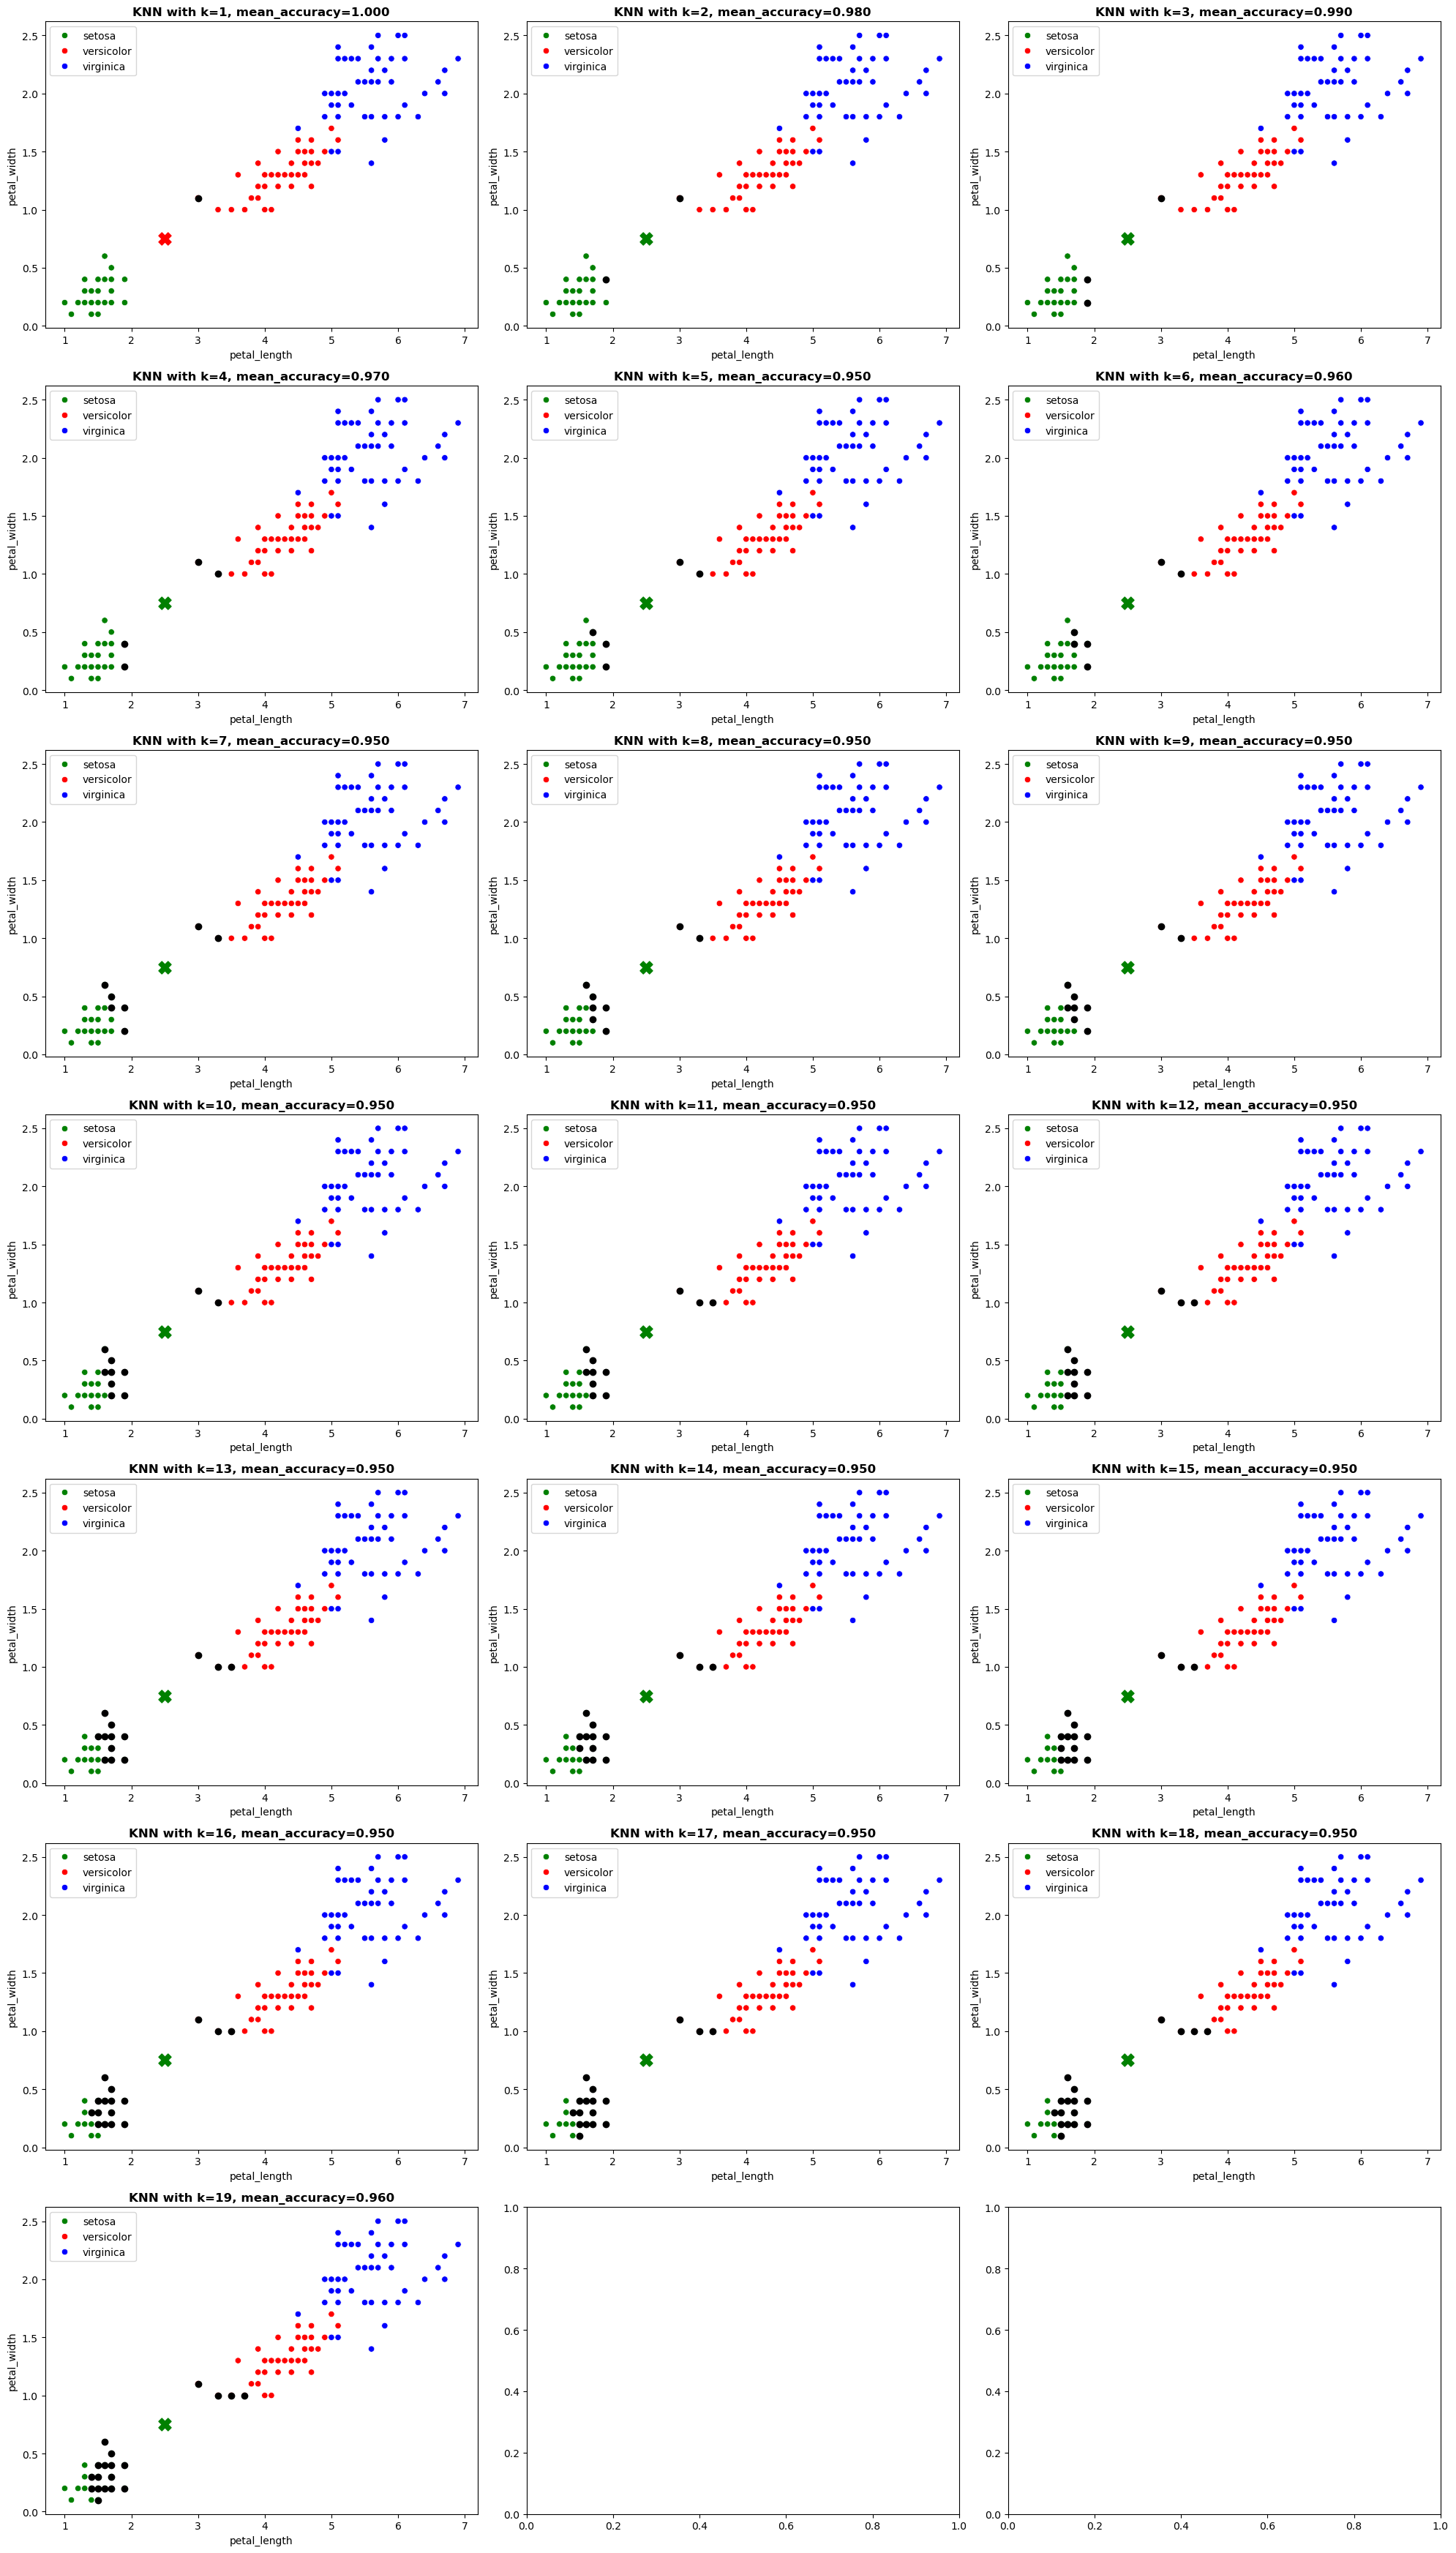

In [576]:
L, l = 2.5, 0.75
n = 20
i = int(np.ceil((n-1)/3))

# Create a figure with subplots
fig, axes = plt.subplots(i, 3, figsize=(20, 5*i)) 
axes = axes.flatten() 
for k, ax in zip(range(1, n), axes):
    predict_and_plot(L, l, k=k, ax=ax, df=cleaned_df)
print()
plt.tight_layout()  
plt.show()

Les données dupliquées et les valeurs conflictuelles (comme les combinaisons identiques de petal_length et petal_width appartenant à des espèces différentes) ont été éliminées.

On s'aperçoit qu'après le nettoyage des données, nous observons le bon nombre de voisins pour k=5 et pour tous les k>5. Egalement, la classe prédite pour k=5 est "setosa" alors que les résultats avec les données non préparées conduisaient à la prédiction d la classe "versicolor". De plus, nous observons sur les graphes qu'à présent, le nombre de voisins sélectionnés correspond à la valeur de k, ce qui n'était pas le cas, lorsqu'on observait les résultats du modèle avec les données non préparées.


Ces résultats mettent en évidence l’importance de la préparation des données dans l’amélioration des performances et de la fiabilité des modèles de classification tels que le KNN. Cela garantit un meilleur comportement du modèle et améliore la précision des prédictions en supprimant les ambiguïtés et en assurant une cohérence dans les sélections de voisins.